# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

--- 

Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;








# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.


El proposito del proyecto es establecer cual es el plan mas rentable para enfocar los esfuerzos publicitarios a ese plan y poder enfocar los esfuerzos en crecer la cartera de usuarios del plan mas rentable.

De la misma manera conocer si la region NY-NJ es mas rentable



## Inicialización

In [140]:
# Cargar todas las librerías que se usaran en el archivo
import numpy as np
import pandas as pd
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()


## Cargar datos

In [141]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv("megaline_calls.csv")
internet = pd.read_csv("megaline_internet.csv")
messages = pd.read_csv("megaline_messages.csv")
plans = pd.read_csv("megaline_plans.csv")
users = pd.read_csv("megaline_users.csv")


In [142]:
#Generamos una funcion para facilitar la tarea de exploración
def looks(datos):
    print("describe:")
    print(datos.describe(include= "all"))
    print()
    print("info:")
    print(datos.info())
    print()
    print("Head:")
    print(datos.head())
    print()
    print("NA?:")
    print(datos.isna().sum())
    print()
    print("Duplicados:")
    print(datos.duplicated().sum())

## Preparar los datos

### Tarifas

In [143]:
# Imprime una muestra de los datos para las tarifas
looks(plans)


describe:
        messages_included  mb_per_month_included  minutes_included  \
count            2.000000               2.000000          2.000000   
unique                NaN                    NaN               NaN   
top                   NaN                    NaN               NaN   
freq                  NaN                    NaN               NaN   
mean           525.000000           23040.000000       1750.000000   
std            671.751442           10861.160159       1767.766953   
min             50.000000           15360.000000        500.000000   
25%            287.500000           19200.000000       1125.000000   
50%            525.000000           23040.000000       1750.000000   
75%            762.500000           26880.000000       2375.000000   
max           1000.000000           30720.000000       3000.000000   

        usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
count          2.000000     2.00000         2.000000        2.000000

No se observan problemas en el DF

#### Corregir datos

 No existen datos que haya que corregir ya que son solo dos tarifas y los datos de los mismos

#### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [144]:
plans["gb_per_month"] =  plans["mb_per_month_included"]/1024
#se añade una columa con los GB por mes, para hacer mas manejables los datos y faciles de entender

## Usuarios/as

In [145]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
looks(users)


describe:
            user_id first_name last_name         age  \
count    500.000000        500       500  500.000000   
unique          NaN        458       399         NaN   
top             NaN    Leonila     David         NaN   
freq            NaN          3         3         NaN   
mean    1249.500000        NaN       NaN   45.486000   
std      144.481833        NaN       NaN   16.972269   
min     1000.000000        NaN       NaN   18.000000   
25%     1124.750000        NaN       NaN   30.000000   
50%     1249.500000        NaN       NaN   46.000000   
75%     1374.250000        NaN       NaN   61.000000   
max     1499.000000        NaN       NaN   75.000000   

                                             city    reg_date  plan  \
count                                         500         500   500   
unique                                         73         266     2   
top     New York-Newark-Jersey City, NY-NJ-PA MSA  2018-03-08  surf   
freq                             

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

 Se observa que solo 34 usuarios cancelaron su plan, como indican los ausentes en _churn_date_. 

### Corregir los datos

### Enriquecer los datos

In [146]:
#se convierte en fechas para poder manipularlos mas facilmente
users["reg_date"] = pd.to_datetime(users["reg_date"])
users["churn_date"] = pd.to_datetime(users["churn_date"])


In [147]:
### celda para hacer la prueba de extraccion de datos
#users["city"].value_counts()
#users[~users["city"].str.contains("NY-NJ")]["city"].value_counts().sum()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Atención ⚠️ - Buen inicio con la importación de librerías y carga de datos. Sin embargo, sería útil añadir una sección introductoria que explique claramente:

Objetivos específicos del análisis
Métricas clave a evaluar
Metodología planificada
¡El resto de la estructura inicial está bien organizada!

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Éxito - Excelente implementación de la función looks() para explorar los datasets. Esta función proporciona una visión completa de la estructura, valores faltantes y duplicados en cada conjunto de datos.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Éxito - Buena decisión al convertir MB a GB para mejor interpretación de los datos. Esta transformación facilita el análisis posterior y la comunicación de resultados.
</div>



## Llamadas

In [148]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
looks(calls)

describe:
             id        user_id   call_date       duration
count    137735  137735.000000      137735  137735.000000
unique   137735            NaN         351            NaN
top     1000_93            NaN  2018-12-27            NaN
freq          1            NaN        1091            NaN
mean        NaN    1247.658046         NaN       6.745927
std         NaN     139.416268         NaN       5.839241
min         NaN    1000.000000         NaN       0.000000
25%         NaN    1128.000000         NaN       1.290000
50%         NaN    1247.000000         NaN       5.980000
75%         NaN    1365.000000         NaN      10.690000
max         NaN    1499.000000         NaN      37.600000

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_dat

In [149]:
def redondeo(dur):
    red = np.ceil(dur)
    return int(red)

### Corregir los datos

In [150]:
calls["call_date"] = pd.to_datetime(calls["call_date"], format= "%Y-%m-%d")
calls["month"] = calls["call_date"].dt.month

# se convierte en datos de fecha y se extrae el mes para los analisis posteriores

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [151]:
calls["duracion_redond"] = calls["duration"].apply(redondeo)
#se redondea a el valor superior ya que aun no consumido el total del minuto, se contabiliza como minuto completo al momento del cobro


## Mensajes

In [152]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
looks(messages)


describe:
              id       user_id message_date
count      76051  76051.000000        76051
unique     76051           NaN          351
top     1000_125           NaN   2018-12-28
freq           1           NaN          702
mean         NaN   1245.972768          NaN
std          NaN    139.843635          NaN
min          NaN   1000.000000          NaN
25%          NaN   1123.000000          NaN
50%          NaN   1251.000000          NaN
75%          NaN   1362.000000          NaN
max          NaN   1497.000000          NaN

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

Head:
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000

### Corregir los datos

In [153]:
#no se observan problemas

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [154]:
messages["message_date"] = pd.to_datetime(messages["message_date"])
messages["month"] = messages["message_date"].dt.month
# se convierte en datos de fecha y se extrae el mes para los analisis posteriores

## Internet

In [155]:
# Imprime la información general/resumida sobre el DataFrame de internet
looks(internet)


describe:
             id        user_id session_date        mb_used
count    104825  104825.000000       104825  104825.000000
unique   104825            NaN          351            NaN
top     1000_13            NaN   2018-12-24            NaN
freq          1            NaN          851            NaN
mean        NaN    1242.496361          NaN     366.713701
std         NaN     142.053913          NaN     277.170542
min         NaN    1000.000000          NaN       0.000000
25%         NaN    1122.000000          NaN     136.080000
50%         NaN    1236.000000          NaN     343.980000
75%         NaN    1367.000000          NaN     554.610000
max         NaN    1499.000000          NaN    1693.470000

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-nul

### Corregir los datos

In [156]:
#no se observan problemas

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [157]:
internet["session_date"] = pd.to_datetime(internet["session_date"])
internet["gb_used"] = np.ceil(internet["mb_used"]/1024)
internet["month"] = internet["session_date"].dt.month
# se convierte en datos de fecha, se extrae el mes para los analisis posteriores y se trasforma de MB a GB ya que el cobro de exdente es en funcion de GB


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [158]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans
#Se observa que aunque el plan surf es mas economico en tarifa base, el cobro por excedente es mayor que el plan Ultimate. 
# Esto nos da ya una sugerencia que en caso de excederse el plan surf seria mas costoso

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Atención ⚠️ - La visualización inicial de las tarifas es correcta, pero falta un análisis explícito de las condiciones de cada plan. Sería útil añadir:

Resumen comparativo de planes
Documentación de límites y costos
Análisis de diferencias entre planes
¡El resto de la estructura está bien organizada!

</div>

## Agregar datos por usuario



In [159]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
cals_per_user = calls.pivot_table(index= ["user_id","month"],values= "duracion_redond", aggfunc= ["sum", "count" ])
cals_per_user.columns = ["minutos_consumidos", "total_llamadas"]
cals_per_user.reset_index(inplace=True)
cals_per_user


,user_id,month,minutos_consumidos,total_llamadas
0,1000,12,124,16
1,1001,8,182,27
2,1001,9,315,49
3,1001,10,393,65
4,1001,11,426,64
...,...,...,...,...
2253,1498,12,339,39
2254,1499,9,346,41
2255,1499,10,385,53
2256,1499,11,308,45


In [160]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado. (realizado en el paso anterior)

In [161]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
msj_mth = messages.pivot_table(index= ["user_id","month"], values= "id", aggfunc= "count" ) #groupby(["user_id","month"])["id"].count()
msj_mth.columns = ["mensajes_enviados"]
msj_mth.reset_index(inplace=True)
msj_mth


,user_id,month,mensajes_enviados
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [162]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
ith_mth = internet.pivot_table(index=["user_id","month"], values= "gb_used", aggfunc= "sum")
ith_mth.columns = ["gb_consumidos"]
ith_mth.reset_index(inplace=True)
ith_mth

,user_id,month,gb_consumidos
0,1000,12,4.0
1,1001,8,21.0
2,1001,9,41.0
3,1001,10,50.0
4,1001,11,49.0
...,...,...,...
2272,1498,12,56.0
2273,1499,9,37.0
2274,1499,10,52.0
2275,1499,11,43.0


In [163]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
mth_cons = cals_per_user.merge(msj_mth, on= ["user_id","month"], how= "outer").merge(ith_mth, on= ["user_id","month"], how= "outer")
mth_cons[mth_cons["month"].isna()]

,user_id,month,minutos_consumidos,total_llamadas,mensajes_enviados,gb_consumidos


In [164]:
# Añade la información de la tarifa
usr_mth_cons= users[["plan","user_id","city"]].merge(mth_cons, on= "user_id", how= "inner") #Al hacer un inner se excluyen usuarios que no usaron el servico, se detectaron 10
bigtable = usr_mth_cons.merge(plans,left_on="plan", right_on= "plan_name")
bigtable.isna().sum()
bigtable.fillna(0, inplace=True)
bigtable.sample(5) #se hace un muestreo para ver de manera muy general la estructura del DF con los datos unificados

,plan,user_id,city,month,minutos_consumidos,total_llamadas,mensajes_enviados,gb_consumidos,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month
1576,surf,1340,"Dallas-Fort Worth-Arlington, TX MSA",11,655.0,95.0,49.0,1.0,50,15360,500,20,10,0.03,0.03,surf,15.0
589,surf,1125,"North Port-Sarasota-Bradenton, FL MSA",12,517.0,65.0,54.0,60.0,50,15360,500,20,10,0.03,0.03,surf,15.0
701,surf,1147,"Urban Honolulu, HI MSA",7,787.0,121.0,30.0,70.0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,surf,1001,"Seattle-Tacoma-Bellevue, WA MSA",8,182.0,27.0,30.0,21.0,50,15360,500,20,10,0.03,0.03,surf,15.0
1261,ultimate,1264,"Los Angeles-Long Beach-Anaheim, CA MSA",7,312.0,43.0,53.0,35.0,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [165]:
# Calcula el ingreso mensual para cada usuario 
#se diseñan 3 funciones para poder calcular en caso de excedente 
def cobro_llamadas (fila):
    minutos_cons = fila["minutos_consumidos"]
    consumo_excedente = 0

    if minutos_cons > fila["minutes_included"]:
        consumo_excedente=(minutos_cons - fila["minutes_included"])*fila["usd_per_minute"]
    return consumo_excedente

def cobro_msj(fila):
    cons = fila["mensajes_enviados"]
    consumo_excedente = 0
    
    if cons > fila["messages_included"]:
        consumo_excedente=(cons - fila["messages_included"])*fila["usd_per_message"]
    return consumo_excedente

def cobro_ith(fila):
    cons = fila["gb_consumidos"]
    consumo_excedente = 0
    
    if cons > fila["gb_per_month"]:
        consumo_excedente=(cons - fila["gb_per_month"])*fila["usd_per_gb"]
    return consumo_excedente


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
Atención ⚠️ - Las funciones de cálculo de cobros necesitan:
pythonCopydef calcular_excedente_llamadas(fila):
    """
    Calcula el cobro excedente por llamadas para un usuario.
    
    Args:
        fila (pd.Series): Fila del DataFrame con datos de consumo
        
    Returns:
        float: Monto del cobro excedente
    """
    minutos_cons = fila["minutos_consumidos"]
    consumo_excedente = 0
    
    if minutos_cons > fila["minutes_included"]:
        consumo_excedente = (minutos_cons - fila["minutes_included"]) * fila["usd_per_minute"]
    
    return consumo_excedente
</div>
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Hola Hesus! no entendi muy bien a que refieres con esta parte
    
</div>



In [166]:
#bigtable.apply(cobro_ith,axis=1) #testing funcion

In [167]:
bigtable["llamadas_cobro_Excedente"] = bigtable.apply(cobro_llamadas,axis=1)
bigtable["mensajes_cobro_Excedente"] = bigtable.apply(cobro_msj,axis=1)
bigtable["internet_cobro_Excedente"] = bigtable.apply(cobro_ith,axis=1)
bigtable

,plan,user_id,city,month,minutos_consumidos,total_llamadas,mensajes_enviados,gb_consumidos,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month,llamadas_cobro_Excedente,mensajes_cobro_Excedente,internet_cobro_Excedente
0,ultimate,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",12,124.0,16.0,11.0,4.0,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.0,0.00,0.0
1,surf,1001,"Seattle-Tacoma-Bellevue, WA MSA",8,182.0,27.0,30.0,21.0,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,60.0
2,surf,1001,"Seattle-Tacoma-Bellevue, WA MSA",9,315.0,49.0,44.0,41.0,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,260.0
3,surf,1001,"Seattle-Tacoma-Bellevue, WA MSA",10,393.0,65.0,53.0,50.0,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.09,350.0
4,surf,1001,"Seattle-Tacoma-Bellevue, WA MSA",11,426.0,64.0,36.0,49.0,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,surf,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",12,339.0,39.0,0.0,56.0,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,410.0
2289,surf,1499,"Orlando-Kissimmee-Sanford, FL MSA",9,346.0,41.0,0.0,37.0,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,220.0
2290,surf,1499,"Orlando-Kissimmee-Sanford, FL MSA",10,385.0,53.0,0.0,52.0,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,370.0
2291,surf,1499,"Orlando-Kissimmee-Sanford, FL MSA",11,308.0,45.0,0.0,43.0,50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.00,280.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Éxito - Excelente uso de pivot_table para agregar datos por usuario y mes. Las transformaciones son claras y eficientes:

Correcto cálculo de minutos consumidos
Adecuada agregación de mensajes
Apropiado cálculo de consumo de internet

</div>


## Estudia el comportamiento de usuario

### Llamadas

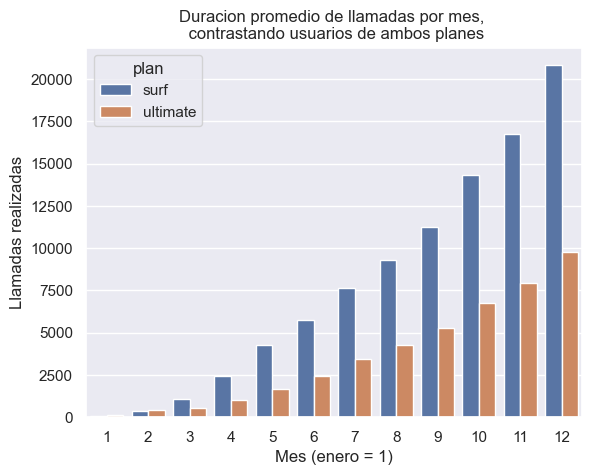

In [168]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
graf1 = bigtable.groupby(["month","plan"])["total_llamadas"].sum().reset_index()
sns.barplot(data= graf1, x= "month", y= "total_llamadas", hue= "plan").set(title='Duracion promedio de llamadas por mes, \n contrastando usuarios de ambos planes', xlabel='Mes (enero = 1)', ylabel='Llamadas realizadas')
plt.show()

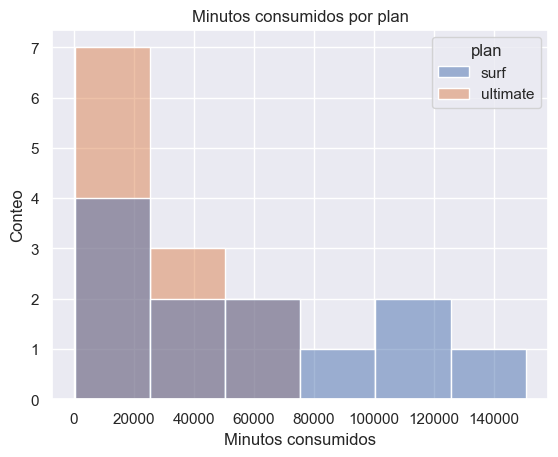

In [169]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
#bigtable["minutos_consumidos"].plot(kind="hist")

graf2= bigtable.groupby(["month","plan"])["minutos_consumidos"].sum().reset_index()
sns.histplot(data= graf2, x= "minutos_consumidos", hue= "plan").set(title='Minutos consumidos por plan', xlabel='Minutos consumidos', ylabel='Conteo')
plt.show()

In [170]:
# Calcula la media y la varianza de la duración mensual de llamadas.
bigtable.groupby("month")["minutos_consumidos"].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,6.0,196.666667,114.611809,16.0,130.75,234.0,289.25,292.0
2,16.0,343.437500,248.127647,0.0,205.50,286.5,462.00,811.0
3,35.0,321.171429,208.275056,23.0,148.00,307.0,430.50,788.0
4,71.0,347.197183,213.589635,16.0,189.50,321.0,490.50,1043.0
5,106.0,401.405660,234.415251,0.0,241.25,410.0,559.50,1055.0
6,144.0,411.604167,212.335209,0.0,258.25,411.0,533.75,1033.0
7,180.0,442.472222,254.019254,0.0,296.75,438.0,579.50,1188.0
8,233.0,413.562232,232.221332,0.0,257.00,395.0,548.00,1292.0
9,280.0,421.378571,223.015468,0.0,256.50,430.0,551.25,1232.0


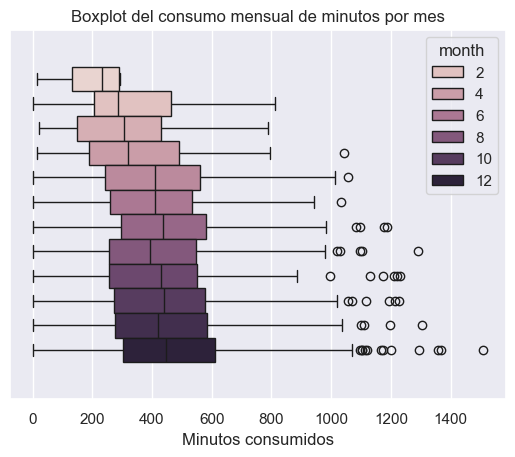

      minutos_consumidos  month      plan
0                  124.0     12  ultimate
1                  182.0      8      surf
2                  315.0      9      surf
3                  393.0     10      surf
4                  426.0     11      surf
...                  ...    ...       ...
2288               339.0     12      surf
2289               346.0      9      surf
2290               385.0     10      surf
2291               308.0     11      surf
2292               496.0     12      surf

[2293 rows x 3 columns]


In [171]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

#bigtable.groupby("month")["total_llamadas"].sum().plot(kind="box")

graf5= bigtable[["minutos_consumidos","month","plan"]]
sns.boxplot(data= graf5, x= "minutos_consumidos",hue="month").set(title='Boxplot del consumo mensual de minutos por mes', xlabel='Minutos consumidos')
plt.show()

print(graf5)

Se observa que los usuarios de surf consumen mas que los usuarios ultimate aparentemente

### Mensajes

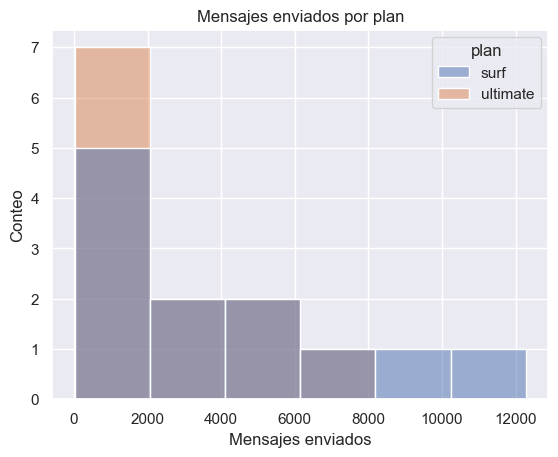

In [172]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
graf3= bigtable.groupby(["month","plan"])["mensajes_enviados"].sum().reset_index()
sns.histplot(data= graf3, x= "mensajes_enviados", hue= "plan").set(title='Mensajes enviados por plan', xlabel='Mensajes enviados', ylabel='Conteo')
plt.show()

Nuevmente se observa que los usuarios de surf consumen mas que los usuarios ultimate aparentemente



### Internet

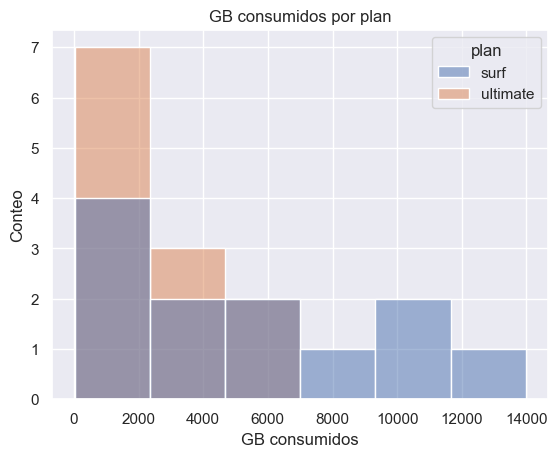

In [173]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

graf4= bigtable.groupby(["month","plan"])["gb_consumidos"].sum().reset_index()
sns.histplot(data= graf4, x= "gb_consumidos", hue= "plan").set(title='GB consumidos por plan', xlabel='GB consumidos', ylabel='Conteo')
plt.show()

De nueva cuenta se observa que los usuarios Surf usan mas GB de internet que los usuarios ultimate

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [174]:
bigtable ["cobro_total"] = bigtable ["mensajes_cobro_Excedente"] +bigtable ["llamadas_cobro_Excedente"] +bigtable ["internet_cobro_Excedente"] + bigtable ["usd_monthly_pay"] 
bigtable.pivot_table(index="plan",values=["mensajes_cobro_Excedente","llamadas_cobro_Excedente","internet_cobro_Excedente","cobro_total"], aggfunc= ["mean","std"])

mean                                                    \
         cobro_total internet_cobro_Excedente llamadas_cobro_Excedente   
plan                                                                     
surf      282.117724               260.063573                  1.84377   
ultimate  166.629167                96.629167                  0.00000   

                                          std                           \
         mensajes_cobro_Excedente cobro_total internet_cobro_Excedente   
plan                                                                     
surf                     0.210381  163.239312               162.708456   
ultimate                 0.000000   87.318976                87.318976   

                                                            
         llamadas_cobro_Excedente mensajes_cobro_Excedente  
plan                                                        
surf                     3.765744                 0.584127  
ultimate                 0.000000                 0.000000

Estos resultados en conjunto nos señalan que los usuarios Surf consumen mas que los usuarios de ultimate.

Para determniar si esta observacion es correcta se requiere de analsis estadisticos

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
A resolver ❗ - Recuerda agregar tus gráficos para esta sección:

Títulos descriptivos para cada gráfico
Etiquetas claras en los ejes
Formato consistente en las leyendas
Anotaciones para valores importantes
Conclusiones más detalladas para esta sección en markdown.

</div>

## Prueba las hipótesis estadísticas


H0 = No existe diferencia significativa entre el ingreso proveniente de los planes surf y ultimate

H1 = El plan surf es mas rentable para la empresa

Se establece el Alfa estandar de 0.05

Se realizara una prueba de T para medidas independientes

In [175]:
# Prueba las hipótesis
#bigtable.query("plan == 'ultimate'")["cobro_total"]

alpha = 0.05
results = st.ttest_ind(bigtable.query("plan == 'ultimate'")["cobro_total"], bigtable.query("plan == 'surf'")["cobro_total"])


In [176]:
print('valor p:', results.pvalue) # tu código: imprime el valor p obtenido)
print()
if results.pvalue < alpha:# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula, los usuarios Surf consumen más")
else:
    print("No podemos rechazar la hipótesis nula, los usuarios surf NO consumen más")

valor p: 7.954135633537011e-67

Rechazamos la hipótesis nula, los usuarios Surf consumen más


Se contrasta si los usuarios de NY-NJ consumen mas que el resto de las regiones

H0 = No existe diferencia significativa entre el ingreso proveniente de los usuarios de NY-NJ y el resto

H1 = Los usuarios de NY-NJ consumen más

Se establece el Alfa estandar de 0.05

Se realizara una prueba de T para medidas independientes

In [177]:
# Prueba las hipótesis
ny_nj = bigtable[bigtable["city"].str.contains("NY-NJ")]["cobro_total"]
non_ny_nj = bigtable[~bigtable["city"].str.contains("NY-NJ")]["cobro_total"]
results2 = st.ttest_ind(ny_nj, non_ny_nj)

In [178]:
print('valor p:', results.pvalue) # tu código: imprime el valor p obtenido)
print()
if results2.pvalue < alpha:# su código: compara los valores p obtenidos con el nivel de significación estadística):
    print("Rechazamos la hipótesis nula, los usuarios NY-NJ consumen más")
else:
    print("No podemos rechazar la hipótesis nula, los usuarios NY-NJ NO consumen más")

valor p: 7.954135633537011e-67

Rechazamos la hipótesis nula, los usuarios NY-NJ consumen más


## Conclusión general

### Encontramos que los esfuerzos publicitarios deben enfocarse en la región de NY-NJ a usuarios potenciales del plan surf, ya que es el que resulta más rentable para la empresa. Tal como sugieren las graficas y los resultados estadisticos confirman


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Quiero recordarte lo fundamental que es que elabores tus conclusiones para dar un cierre efectivo a tu proyecto. Estas conclusiones son esenciales para resumir tus hallazgos y clarificar el impacto de tu análisis. Asegúrate de destacar lo que has aprendido y cómo se relaciona con los objetivos que planteaste al inicio.

Con unas conclusiones bien formuladas, tu proyecto ganará en claridad y profundidad. ¡Sigue adelante, estoy aquí para apoyarte en lo que necesites! 😊
    </div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

<b>Atención</b> ⚠️ - Para mejorar la claridad y profundidad de tus conclusiones finales, considera las siguientes pautas:

<ul>
    <li><b>Resumen de los Hallazgos Clave:</b> Incluye brevemente tus descubrimientos más importantes.</li>
    <li><b>Impacto de tus Elecciones de Procesamiento de Datos:</b> Reflexiona sobre cómo tus decisiones influyeron en los resultados.</li>
    <li><b>Relación con los Objetivos Iniciales:</b> Vincula tus hallazgos con los objetivos del proyecto.</li>
    <li><b>Relevancia de los Hallazgos:</b> Discute la importancia de tus resultados para la empresa o usuarios.</li>
    <li><b>Sugerencias y Recomendaciones:</b> Ofrece cualquier consejo basado en tus análisis.</li>
    <li><b>Reflexiones Finales:</b> Concluye con tus pensamientos finales y aprendizajes del proyecto.</li>
</ul>

Recuerda que una conclusión efectiva resume tus hallazgos y proporciona insights y reflexiones sobre su impacto y relevancia. ¡Sigue así y éxito en la etapa final!
</div>

# Comentario General del Revisor

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gracias por tu esfuerzo en este proyecto. Has demostrado un buen dominio de las técnicas de análisis de datos, y tu trabajo tiene varias fortalezas. Sin embargo, el proyecto aún **no puede ser aprobado** debido a algunos puntos pendientes. A continuación, te detallo los aspectos positivos y las áreas a mejorar para que puedas lograr la aprobación:

#### Puntos Positivos:
- **Implementación de Funciones**: Excelente uso de la función `looks()` para explorar los datos y las funciones personalizadas para calcular cobros excedentes. Este tipo de modularización es una práctica muy valiosa en proyectos grandes.
- **Transformaciones de Datos**: Muy buena decisión al convertir datos de MB a GB, lo cual facilita la interpretación y análisis de consumo de datos. Además, el uso de `pivot_table` para agregar datos por usuario y mes está bien implementado.
- **Visualización**: Las gráficas aportan claridad y son un buen complemento para comprender el comportamiento de los usuarios.

#### Áreas a Mejorar para la Aprobación:
- **Limpieza de Comentarios**: Recuerda eliminar todos los comentarios entre corchetes cuadrados ([ ]) antes de entregar el proyecto, ya que estos son solo orientaciones iniciales.
- **Conclusiones Intermedias en Markdown**: Es importante incluir conclusiones en cada sección de análisis en formato Markdown, sobre todo en aquellos apartados donde se solicitan. Estas conclusiones intermedias facilitan la comprensión del análisis y la conexión de los hallazgos a lo largo del proyecto.
- **Conclusión Final**: Para que el proyecto pueda ser aprobado, es necesario que agregues una conclusión general. Esta debe resumir tus principales hallazgos, relacionarlos con los objetivos iniciales, y brindar una visión completa del análisis realizado.

#### Áreas para Explorar en el Futuro:
- **Análisis Temporal**: Sería útil analizar tendencias mensuales o estacionales en el consumo para identificar patrones de comportamiento de los usuarios.
- **Visualizaciones Avanzadas**: Explorar mapas de calor u otras representaciones visuales complejas puede ayudar a resaltar patrones en el consumo de recursos a lo largo del tiempo.
- **Modelos Predictivos**: Considera la posibilidad de implementar modelos predictivos en proyectos futuros, lo cual podría ofrecer insights más profundos para la toma de decisiones.

Una vez que completes las mejoras indicadas y agregues las conclusiones solicitadas, el proyecto estará listo para una nueva revisión. ¡Sigue adelante, estás cerca de la meta! 💪🚀😊

</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Hola de nuevo, He realizado todas las correcciones y sugerencias.
Espero este mejor :)  

Muchas gracias por el tiempo de revisar y corregir mi proyecto
    
</div>